<a href="https://colab.research.google.com/github/rjromo/rubenjromo.com/blob/master/ProyectoExperimentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import folium
%matplotlib inline

In [35]:
path='/content/base.xlsx'
df = pd.read_excel(path)
del df['Individuo']
df.head()

,Promedio,Sexo,Tiempo
0,7.10,Masculino,40
1,6.96,Masculino,120
2,8.42,Femenino,40
3,7.78,Masculino,105
4,8.05,Femenino,30


In [0]:
df['Tiempo']=(df['Tiempo']-df['Tiempo'].mean())/df['Tiempo'].std()

In [21]:
df.head()

,Promedio,Sexo,Tiempo
0,7.10,Masculino,40
1,6.96,Masculino,120
2,8.42,Femenino,40
3,7.78,Masculino,105
4,8.05,Femenino,30


In [36]:
df.corr()

,Promedio,Tiempo
Promedio,1.000000,-0.116529
Tiempo,-0.116529,1.000000


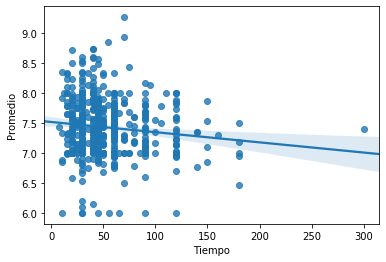

In [37]:
sns.regplot(x="Tiempo", y="Promedio", data=df)


In [38]:
pearson_coef, p_value = stats.pearsonr(df['Promedio'], df['Tiempo'])
print("El coeficiente de correlación Pearson es", pearson_coef, " con un valor P de P =", p_value)

El coeficiente de correlación Pearson es -0.11652946533474595  con un valor P de P = 0.008435368781962863


Text(0.5, 1.0, 'Frecuencia de Promedios')

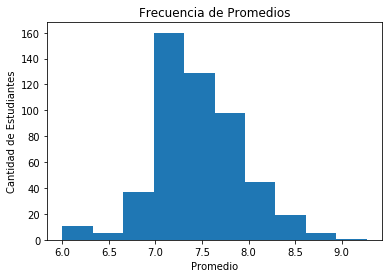

In [39]:
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["Promedio"])

plt.pyplot.xlabel("Promedio")
plt.pyplot.ylabel("Cantidad de Estudiantes")
plt.pyplot.title("Frecuencia de Promedios")

Text(0.5, 1.0, 'Frecuencia de Tiempo de Estudio')

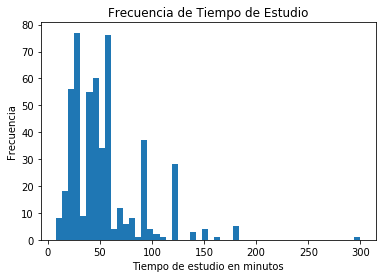

In [54]:
plt.pyplot.hist(df["Tiempo"], bins = 50)

# set x/y labels and plot title
plt.pyplot.xlabel("Tiempo de estudio en minutos")
plt.pyplot.ylabel("Frecuencia")
plt.pyplot.title("Frecuencia de Tiempo de Estudio")

In [46]:
bins = np.linspace(min(df["Tiempo"]), max(df["Tiempo"]), 4)

group_names = ['0h-2h', '2h-3h', '+3h']

df['Tiempo-binned'] = pd.cut(df['Tiempo'], bins, labels=group_names, include_lowest=True )
df[['Tiempo','Tiempo-binned']].head()

,Tiempo,Tiempo-binned
0,40,0h-2h
1,120,2h-3h
2,40,0h-2h
3,105,0h-2h
4,30,0h-2h


In [47]:
df['Tiempo-binned'].value_counts()
bins

array([  8.        , 105.33333333, 202.66666667, 300.        ])

Text(0.5, 1.0, 'Frecuencia de Estudio')

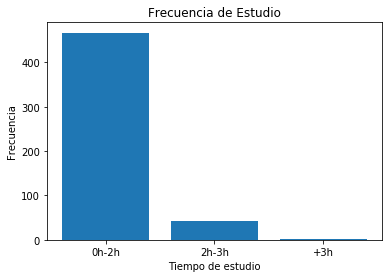

In [48]:
pyplot.bar(group_names, df["Tiempo-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("Tiempo de estudio")
plt.pyplot.ylabel("Frecuencia")
plt.pyplot.title("Frecuencia de Estudio")

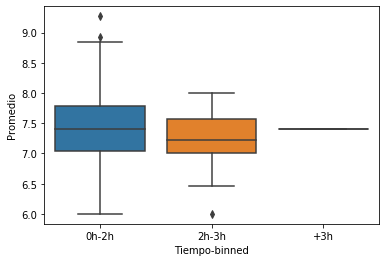

In [55]:
sns.boxplot(x="Tiempo-binned", y="Promedio", data=df)

In [61]:
categoria_sexo = pd.get_dummies(df["Sexo"])

categoria_sexo

,Femenino,Masculino
0,0,1
1,0,1
2,1,0
3,0,1
4,1,0
...,...,...
505,0,1
506,0,1
507,1,0
508,0,1


In [62]:
df = pd.concat([df, categoria_sexo], axis=1)
df

,Promedio,Sexo,Tiempo,Tiempo-binned,Femenino,Masculino
0,7.10,Masculino,40,0h-2h,0,1
1,6.96,Masculino,120,2h-3h,0,1
2,8.42,Femenino,40,0h-2h,1,0
3,7.78,Masculino,105,0h-2h,0,1
4,8.05,Femenino,30,0h-2h,1,0
...,...,...,...,...,...,...
505,7.37,Masculino,20,0h-2h,0,1
506,7.14,Masculino,45,0h-2h,0,1
507,7.82,Femenino,90,0h-2h,1,0
508,7.27,Masculino,90,0h-2h,0,1


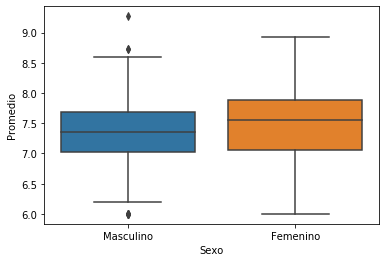

In [63]:
sns.boxplot(x="Sexo", y="Promedio", data=df)

In [69]:
df_group_one = df[['Sexo','Promedio','Tiempo-binned']]
df_group_one.head(10)

,Sexo,Promedio,Tiempo-binned
0,Masculino,7.10,0h-2h
1,Masculino,6.96,2h-3h
2,Femenino,8.42,0h-2h
3,Masculino,7.78,0h-2h
4,Femenino,8.05,0h-2h
5,Masculino,7.44,0h-2h
6,Masculino,6.87,0h-2h
7,Femenino,6.90,0h-2h
8,Femenino,7.94,0h-2h
9,Masculino,8.73,0h-2h


In [73]:
df_group_one = df_group_one.groupby(['Sexo'],as_index=False).mean()
df_group_one

,Sexo,Promedio
0,Femenino,7.512768
1,Masculino,7.384595


In [90]:
df_gptest = df[['Sexo','Promedio','Tiempo-binned']]
grouped_test1 = df_gptest.groupby(['Sexo','Tiempo-binned'],as_index=False).mean()
grouped_test1.head()

,Sexo,Tiempo-binned,Promedio
0,Femenino,0h-2h,7.529375
1,Femenino,2h-3h,7.353750
2,Femenino,+3h,7.400000
3,Masculino,0h-2h,7.396873
4,Masculino,2h-3h,7.239615


In [97]:
grouped_pivot = grouped_test1.pivot(index='Tiempo-binned',columns='Sexo')
grouped_pivot

Promedio          
Sexo           Femenino Masculino
Tiempo-binned                    
0h-2h          7.529375  7.396873
2h-3h          7.353750  7.239615
+3h            7.400000       NaN

In [98]:
grouped_pivot = grouped_pivot.fillna(0) 
grouped_pivot

Promedio          
Sexo           Femenino Masculino
Tiempo-binned                    
0h-2h          7.529375  7.396873
2h-3h          7.353750  7.239615
+3h            7.400000  0.000000

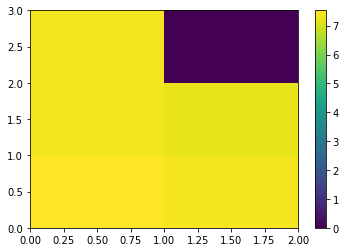

In [99]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.pcolor(grouped_pivot)
plt.colorbar()
plt.show()

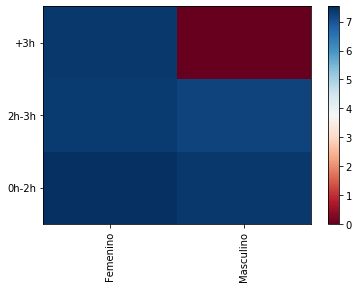

In [101]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')


row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index


ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)


ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [119]:
grouped_test2=df_gptest[['Promedio', 'Tiempo-binned']].groupby(['Tiempo-binned'])
grouped_test2.head(1)

,Promedio,Tiempo-binned
0,7.10,0h-2h
1,6.96,2h-3h
297,7.40,+3h


In [107]:
df_gptest.head()

,Sexo,Promedio,Tiempo-binned
0,Masculino,7.10,0h-2h
1,Masculino,6.96,2h-3h
2,Femenino,8.42,0h-2h
3,Masculino,7.78,0h-2h
4,Femenino,8.05,0h-2h


In [113]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('0h-2h')['Promedio'], grouped_test2.get_group('2h-3h')['Promedio'], grouped_test2.get_group('+3h')['Promedio'])  
 
print( "Resultados ANOVA: F=", f_val, ", P =", p_val)

Resultados ANOVA: F= 2.0336008819146194 , P = 0.13192952827767376


In [120]:
grouped_test3=df_gptest[['Promedio', 'Sexo']].groupby(['Sexo'])
grouped_test3.head(2)

,Promedio,Sexo
0,7.10,Masculino
1,6.96,Masculino
2,8.42,Femenino
4,8.05,Femenino


In [121]:
f_val, p_val = stats.f_oneway(grouped_test3.get_group('Masculino')['Promedio'], grouped_test3.get_group('Femenino')['Promedio'])  
 
print( "Resultados ANOVA: F=", f_val, ", P =", p_val)

Resultados ANOVA: F= 7.978522939665553 , P = 0.0049196548595049384
